# K Nearest Neighbor classifiction for the Glass dataset


### Glass Identification Dataset:

Attribute Information:

   	1. Id number: 1 to 214
   	2. RI: refractive index
   	3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   	4. Mg: Magnesium
   	5. Al: Aluminum
   	6. Si: Silicon
   	7. K: Potassium
   	8. Ca: Calcium
   	9. Ba: Barium
  	10. Fe: Iron
  	11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps
      
The dataset downloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/glass+identification)


## Part 1. Data Analysis

In [5]:
# importing the packages and data for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv(r'C:\Users\Kshitij\glass.data', header = None)

In [6]:
# know the shape of dataset and if there are null values
print('Data Shape :\n\n',dataset.shape) # 1 see the shape of dataframe
print('\n\n Null Values in Data :\n\n',dataset.isnull().sum()) # 2 Check for null values
dataset[dataset.duplicated()] # 3 Check for duplicates

Data Shape :

 (214, 11)


 Null Values in Data :

 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64


,0,1,2,3,4,5,6,7,8,9,10


To make it easier to understand let us replace the column names to make more sense

In [7]:
dataset.columns = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']

dataset.head()


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
print('Dataset description: \n\n',dataset.describe(),'\n\n')
print(dataset.info())

Dataset description: 

                Id          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516523   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219 

__Observation 1:__ We see that all the features are float type and the type of target is integer. <br> We also notice that the dataset has no <i>missing values, duplicates</i> so no preprocessing would be required. We will now spend more time to understand the dataset visually 

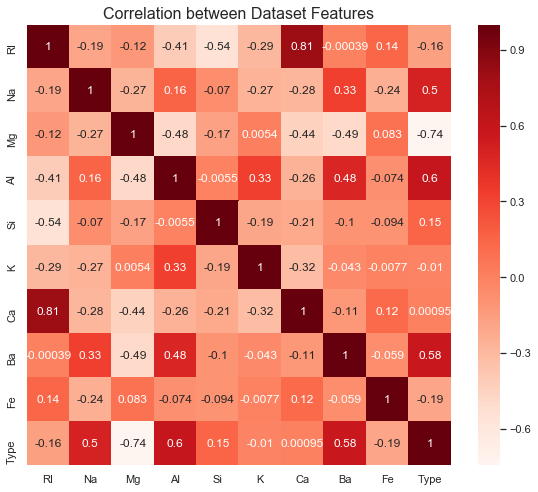

In [36]:
plt.figure(figsize = (8,7))
sns.set()
sns.heatmap(dataset.iloc[:,1:11].corr(), annot = True, cmap = 'Reds')
plt.title('Correlation between Dataset Features', fontsize = 16)
plt.tight_layout()

__Observation 2:__ With the heatmap we could conclude that there is no multi - collinearity amongst the features. This would help us for KNN classification as the extra weigth would not be added to related variables for clustering

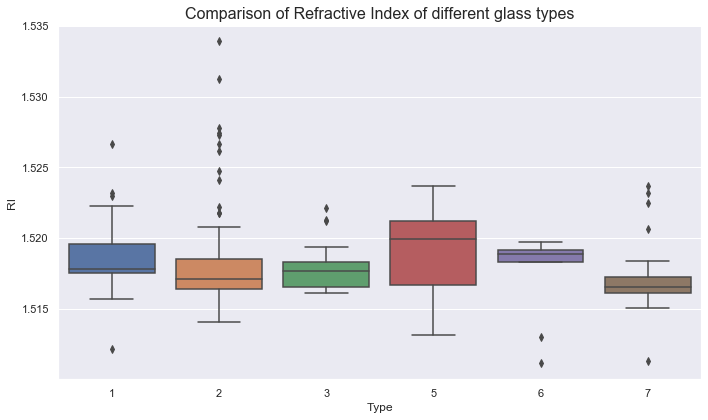

In [37]:
# The refractive index is a property through which light bends when it hits a glass, let ut compare for different types
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Type', y = 'RI', data = dataset)
plt.title('Comparison of Refractive Index of different glass types', fontsize = 16)
plt.tight_layout()

__Observation 3:__ We see that through RI not much is discernible on the nature and type of glass. But type 5 has highest index and type 7 has the lowest. We also observe that type 2 RI has many outliers which have high RI and the lowest variation in RI is observed for type 6. <br>We shall try to investigate more on the univariate analysis of different features. Seaborn distplot provides a great visualization in this regards

In [13]:
dataset['Type'].value_counts() ## Check the number of unique values

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

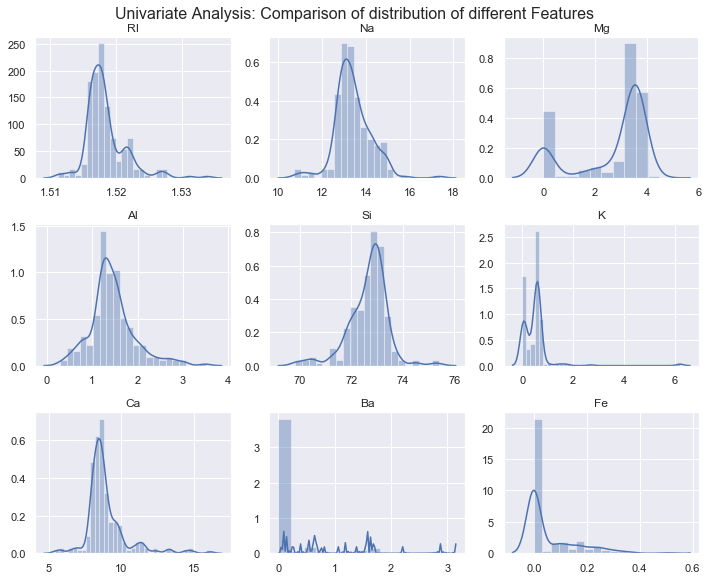

In [40]:
fig = plt.figure(figsize = (10,8))
gs = fig.add_gridspec(3,3)
sns.set()


for i,element in enumerate(dataset.columns[1:10]):
    k = i+1
    ax = fig.add_subplot(3,3,k)
    sns.distplot(dataset.loc[:,element])
    ax.set_xlabel('')
    ax.set_title(element)
    plt.suptitle('Univariate Analysis: Comparison of distribution of different Features', fontsize = 16, va='bottom')
    plt.tight_layout()


__Observation 4:__ The graph shows that different elements are added to make the graph type in which Silicon (Si) obviously would be the most common. Apart from it Sodium (Na) and Calcium (Ca) are also used. The frequency for Iron (Fe) and Barium (Ba) has highest frequency around zero, which means for most of the Glass types they are not used. But, for some types they might be used. <Br>The use of Aluminium shows near normal distribution while Magnesium (Mg) and Potassium (K) show bimodal distribution.</Br> <br>Addition of such elements changes the glass properties. <br>Noteworthy here is the scale of each feature. We should be aware later during the classification that despite the value Silicon being higher, it is the addition/presence of other elements in traces which determines the glass type. While clustering the target one should be aware of such facts and should consider data transformation.

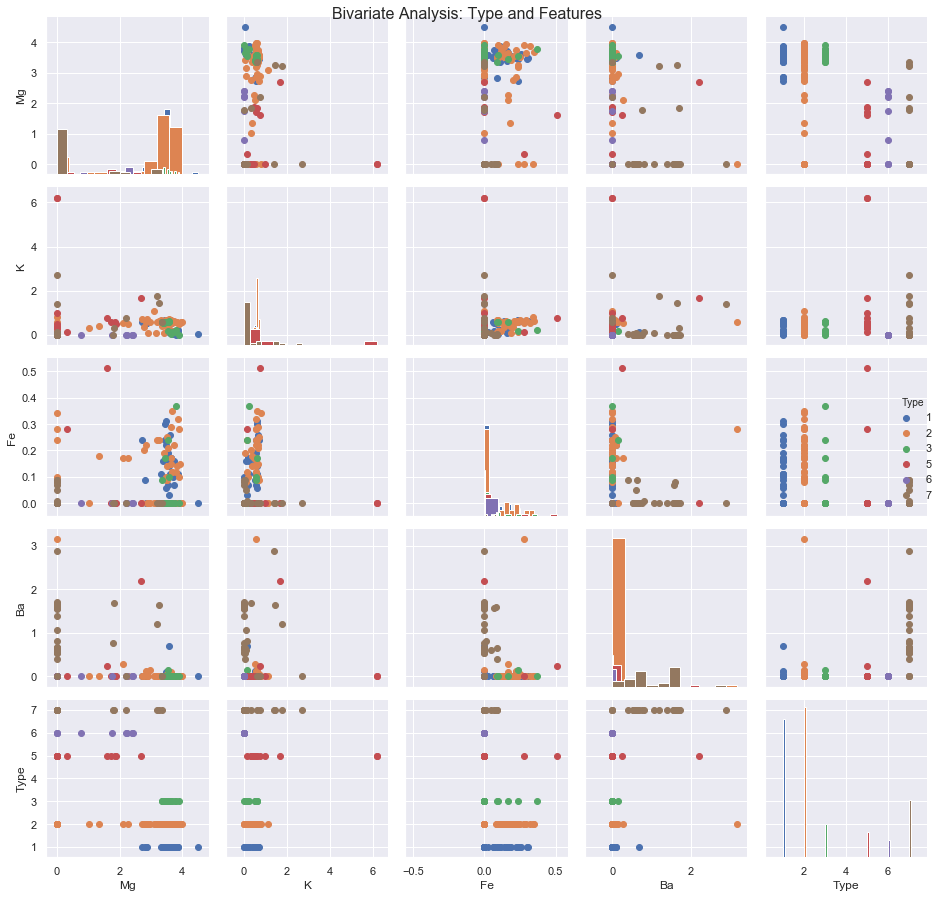

In [45]:
# Bivariate
g = sns.PairGrid(dataset[['Mg','K','Fe','Ba','Type']], hue="Type")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.suptitle('Bivariate Analysis: Type and Features',fontsize = 16, va='bottom')
g.add_legend()
plt.tight_layout()

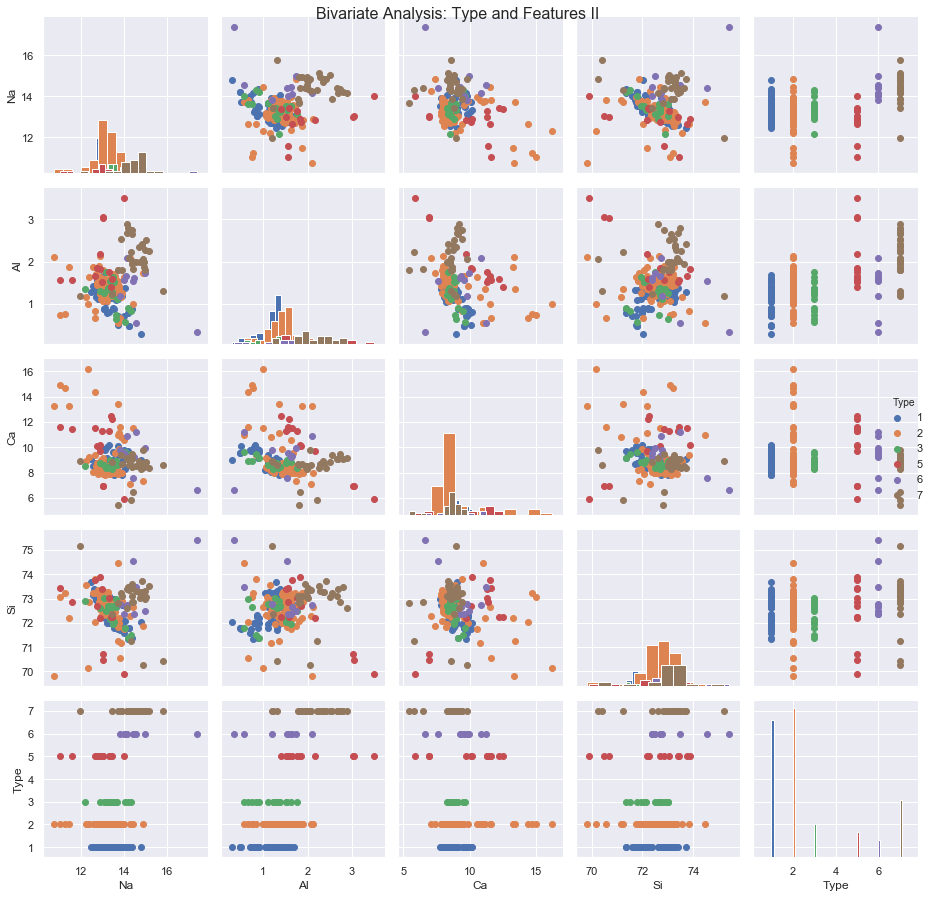

In [46]:
g = sns.PairGrid(dataset[['Na','Al','Ca','Si','Type']], hue="Type")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.suptitle('Bivariate Analysis: Type and Features II',fontsize = 16, va='bottom')
g.add_legend()
plt.tight_layout()

<Figure size 1008x720 with 0 Axes>

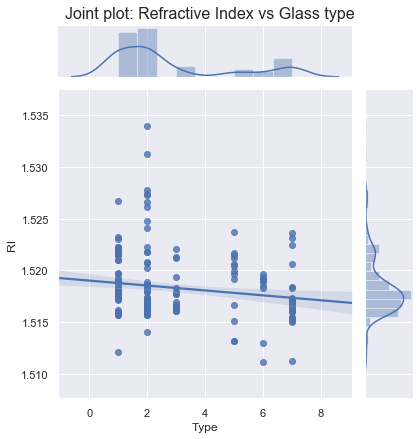

In [52]:
fig = plt.figure(figsize = (14,10))
sns.jointplot(x = "Type", y = "RI", data = dataset, kind = 'reg')
plt.suptitle('Joint plot: Refractive Index vs Glass type', va='bottom', fontsize = 16)
plt.tight_layout()

__Observation 5:__ The bivariate analysis leads us to some important conclusions:
1. We see that type 1 and type 2 have the highest frequency and more spread when compared to other elements added to make different types of glasses
2. The variance in type 2 are highest in all the types
3. The presence of type 4 glass types is negligible
<br>

Before we move to KNN classification it is important to note that model might be biased for type 1 and type 2 glasses because of their numbers.

## Part 2: KNN Modelling

In [71]:
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:,1:10] # we exclude the glass id and the target
y = dataset.iloc[:,10] # picking the target as y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [72]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.57016436, -0.8021311 ,  0.59394972, ..., -0.73204433,
        -0.36042422, -0.5574741 ],
       [-0.12738242, -0.01596892,  0.14178098, ...,  0.03745343,
        -0.36042422, -0.5574741 ],
       [ 1.00931153, -0.48275272,  0.68438347, ...,  0.59585004,
        -0.36042422,  1.35466909],
       ...,
       [-0.4578167 ,  0.34026082,  0.70525279, ..., -0.74566376,
        -0.36042422, -0.5574741 ],
       [ 2.7110481 ,  0.67192299,  0.71916568, ...,  0.57542089,
        -0.36042422,  0.56731601],
       [-1.73659739, -0.54417164, -1.85471789, ..., -1.39258666,
        -0.36042422, -0.5574741 ]])

In [73]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_base = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_base)

array([[ 9,  5,  0,  0,  0,  0],
       [ 8, 15,  0,  1,  0,  0],
       [ 3,  2,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  7]], dtype=int64)

__Confusion Matrix__: This matrix is considered one of the most important matrix to judge the accuracy of the classifier. The matrix present the classification for predicted vs actual values. The column represent the actual test values and the row represent the predicted values. <br> Let us test the accuracy of the matrix followed by the model summary

In [74]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy Score : ",accuracy_score(y_test, y_pred_base),"\n\n")

print(classification_report(y_test,y_pred_base))

Accuracy Score :  0.6111111111111112 


              precision    recall  f1-score   support

           1       0.45      0.64      0.53        14
           2       0.62      0.62      0.62        24
           3       0.00      0.00      0.00         5
           5       0.50      0.50      0.50         2
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         7

    accuracy                           0.61        54
   macro avg       0.60      0.54      0.55        54
weighted avg       0.58      0.61      0.59        54



C:\Users\Kshitij\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


__Precision__: Precision means true positives divided by the total positive prediction detected by the calssification model i.e. TP/(TP+FP)
<br>__Recall__: Recall means true positives divided by the correct predictions of the target i.e. TP/(TP+FN)

## Part 2.1 Cross-validation & Hyperparameter Tuning

An important aspect of Machine Learning is defining the hyper-parameters. These are the parameters which are to be set manually. Setting such parameters could strengthen on weake the model. <br>We see that above model above has very low accuracy, precision and recall. In machine learning this could occur for 3 major reasons:
1. Attributability: That the changes in value of target variable could be explaind by changes in the feature
2. Incomplete data: That the data for training the classifier is less or limited, a classifier needs ample data for training to fit the model
3. Untuned hyper-parameters: Choosing the right hyper-parameters are great determinant for a great model, a tuned classifer would give better results even with lesser data</br>
<br><br><b>Cross validation is another important model testing methodology. It reduces the accuracy of the model on chance. Let us find the accuracy of the current base model with k fold of 10

In [75]:
from sklearn.model_selection import cross_val_score
print('Mean cross val score is : ',np.mean(cross_val_score(classifier, X_train, y_train, cv=10, 
                                                           scoring='accuracy')),"\n\n")
print(cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy'))

C:\Users\Kshitij\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Kshitij\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Mean cross val score is :  0.6352506265664161 


[0.65       0.52631579 0.6875     0.5        0.625      0.6875
 0.53333333 0.57142857 0.78571429 0.78571429]


The warning message points out that the data on different class of target is not sufficient, as a result few of the cross val scores are very high and the others are low

Let us test hyper-parameter __'n_neighbors'__ with cross validated score value

The optimal number of neighbors is 1


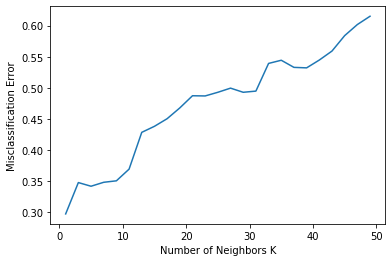

In [76]:
 # creating odd list of K for KNN
k_list= list(range(1,50,2))

 # empty list that will hold cv scores
cv_scores = []

 # perform 10-fold cross validation
for k in k_list:
     knn = KNeighborsClassifier(n_neighbors=k)
     scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
     cv_scores.append(scores.mean())
#As we can see above, scikit-learn comes in handy with its cross_val_score() method. We specifiy that we are performing 10 folds with the cv=10 parameter and that our scoring metric should be accuracy since we are in a classification setting.

#Finally, we plot the misclassification error versus K (Use the code below).

#```
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = k_list[MSE.index(min(MSE))]
print( "The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(k_list, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


The result points that we should set the n_neighbors value as 1, let us rebuild the model with this tuning

In [87]:
# Fitting 'tuned' K-NN to the Training set

classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_tuned = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_tuned)

array([[12,  1,  1,  0,  0,  0],
       [ 6, 17,  1,  0,  0,  0],
       [ 1,  2,  2,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  6]], dtype=int64)

In [88]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy Score : ",accuracy_score(y_test, y_pred_tuned),"\n\n")

print(classification_report(y_test,y_pred_tuned))

Accuracy Score :  0.7407407407407407 


              precision    recall  f1-score   support

           1       0.60      0.86      0.71        14
           2       0.81      0.71      0.76        24
           3       0.50      0.40      0.44         5
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       1.00      0.86      0.92         7

    accuracy                           0.74        54
   macro avg       0.82      0.72      0.75        54
weighted avg       0.77      0.74      0.74        54



In [79]:
print('Mean cross val score is : ',np.mean(cross_val_score(classifier, X_train, y_train, cv=5, 
                                                           scoring='accuracy')),"\n\n")

Mean cross val score is :  0.7024183006535948 




We observed that by tuning the n_estimator above model accuracy score has improved from 63% to 70% <br>Let us now try changing the 'distance' param

The optimal number of neighbors is 9


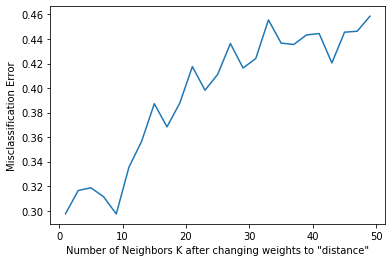

In [80]:
## could this be tuned better? Let us try weigth proportion

cv_scores = []

 # perform 5-fold cross validation
for k in k_list:
     knn = KNeighborsClassifier(n_neighbors=k, weights ="distance")
     scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
     cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = k_list[MSE.index(min(MSE))]
print( "The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(k_list, MSE)
plt.xlabel('Number of Neighbors K after changing weights to "distance"')
plt.ylabel('Misclassification Error')
plt.show()


In [90]:
classifier = KNeighborsClassifier(n_neighbors = 9, weights = 'distance')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print("Accuracy Score : ",accuracy_score(y_test, y_pred),"\n\n")

print(classification_report(y_test,y_pred))

Accuracy Score :  0.7222222222222222 


              precision    recall  f1-score   support

           1       0.57      0.86      0.69        14
           2       0.76      0.67      0.71        24
           3       1.00      0.20      0.33         5
           5       1.00      1.00      1.00         2
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         7

    accuracy                           0.72        54
   macro avg       0.81      0.70      0.71        54
weighted avg       0.76      0.72      0.71        54



In [91]:
confusion_matrix(y_test, y_pred)

array([[12,  2,  0,  0,  0,  0],
       [ 7, 16,  0,  0,  1,  0],
       [ 2,  2,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  7]], dtype=int64)

In [92]:
print('Mean cross val score is : ',np.mean(cross_val_score(classifier, X_train, y_train, cv=5, 
                                                           scoring='accuracy')),"\n\n")

Mean cross val score is :  0.7026143790849673 




### Part 2.2 Principal Component Analysis
PCA is used for dimensionality reduction, and transforms the dataset such that the first component accounts for highest variation, the second component second highest and so on. It could be more useful when:
1. Dataset has high number of features, or
2. The features have high collinearity

Text(0.5, 0, 'Individual Principal Components and Cumulative Distribution')

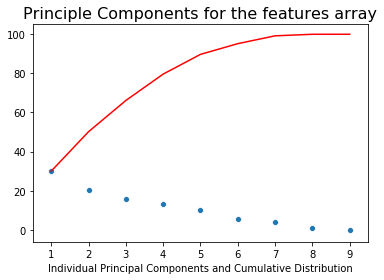

In [83]:

from sklearn.decomposition import PCA
pca = PCA(n_components = 9)

Xtrain_pca = pca.fit_transform(X_train)
Xtest_pca = pca.transform(X_test)

cumulative_dist = np.cumsum(pca.explained_variance_ratio_)*100
pca_range = (pca.explained_variance_ratio_)*100
sns.lineplot(range(1,10),cumulative_dist, color = 'red')
sns.scatterplot(range(1,10),pca_range)
plt.title("Principle Components for the features array", fontsize = 16)
plt.xlabel('Individual Principal Components and Cumulative Distribution')

The optimal number of neighbors is 1


Text(0.5, 1.0, 'K-neighbors after dimension reduction')

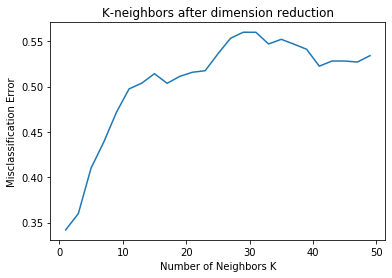

In [55]:
 cv_scores = []

 # perform 10-fold cross validation
 for k in k_list:
     knn = KNeighborsClassifier(n_neighbors=k)
     scores = cross_val_score(knn, Xtrain_pca[:,1:7], y_train, cv=5, scoring='accuracy')
     cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = k_list[MSE.index(min(MSE))]
print( "The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(k_list, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('K-neighbors after dimension reduction')

In [93]:
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(Xtrain_pca[:,1:7], y_train)

y_pred_pca = classifier.predict(Xtest_pca[:,1:7])

print('Accuracy score for KNN classification after PCA : ',accuracy_score(y_test, y_pred_pca),'\n\n')

print(classification_report(y_test,y_pred_pca))

Accuracy score for KNN classification after PCA :  0.6481481481481481 


              precision    recall  f1-score   support

           1       0.55      0.79      0.65        14
           2       0.67      0.58      0.62        24
           3       0.50      0.20      0.29         5
           5       0.67      1.00      0.80         2
           6       1.00      0.50      0.67         2
           7       0.86      0.86      0.86         7

    accuracy                           0.65        54
   macro avg       0.71      0.65      0.65        54
weighted avg       0.66      0.65      0.64        54



In [94]:
print('Mean cross val score is : ',np.mean(cross_val_score(classifier, X_train, y_train, cv=5, 
                                                           scoring='accuracy')),"\n\n")

Mean cross val score is :  0.7024183006535948 




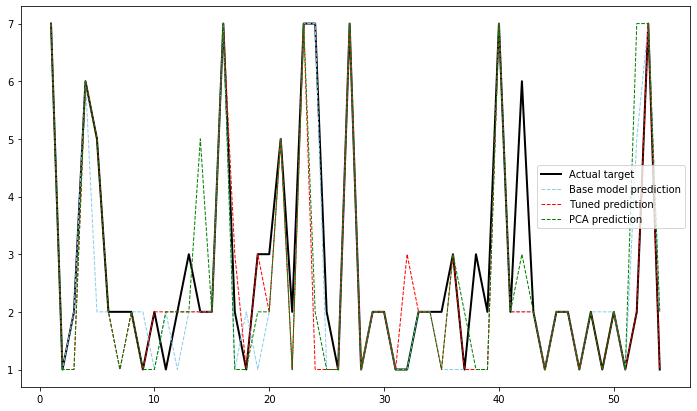

In [84]:
plt.figure(figsize = (12,7))
plt.plot( range(1,55), y_test, marker='', color='black', linewidth=2, label="Actual target")
plt.plot( range(1,55), y_pred_base, marker='', color='skyblue', linewidth=1, label="Base model prediction", linestyle='dashed')
plt.plot( range(1,55), y_pred_tuned, marker='', color='red', linewidth=1, label = 'Tuned prediction', linestyle='dashed')
plt.plot( range(1,55), y_pred_pca, marker='', color='green', linewidth=1, linestyle='dashed', label="PCA prediction")
plt.legend()

In [21]:
steps = [('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())]
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps) # define the pipeline object.


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


# Assignment Conclusions

In the assignment we have done the following:
1. Run the KNN classifier with defaults values
2. Find the optimum value for n_neigbors hyperparameter
3. Did the cross validation for assessing the model accuracy
4. Compared results for 'uniform' and 'distance' for neighbor weights
5. Tried to reduce dimensionality of the dataset using PCA

__Results__:
1. The highest accuracy was observed in model with weight = 'uniform' model for neighbors = 1
2. The tranformation of feature into PCA led to reduction in accuracy beacuse of lower dimensions and lesser observations
3. The data had impbalanced data, most datapoints fall for type 1 and type 2 which is reducing the precision and recall

#### KNN Classifier Report

| Methodology | Optimum neighbors | Cross-val Score | Accuracy Score |
| --- | --- | --- | --- |
| Base Model | 5 | 0.64 | 0.61 |
| KNN (tuned neighbors) | 1 | 0.70 | 0.74 |
| KNN (tuned weights) | 9 | 0.70 | 0.72 |
| KNN with PCA | 1 | 0.70 | 0.64 |

### Limitations in the assignment

The above codes have tried to fit the best model for prediction but there are some assumptions in the approach which can be listed:
1. For cross-validation we have not seperated the data into test and train before standardization, so testing for cross-val already has info on training data
2. No stratification was done to reduce the imbalance on the larger dataset it would have an impact but in a small data the results were comparable

<br>__Way forward__: To reduce the bias in model fitting we couuld use the stratified splitting and explore the pipeline approach